# Biometric Identification with OMA algorithm applied to DEAP data
This notebook is very similar to ```subject-identification-OMA-DEAP-heatmaps_01.ipynb```, except it uses the OMA modes in tabular format, as a csv, instead of heatmaps. The information is exactly the same, but the tabular data tends to have shorter wall times.

## Imports and Settings

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *

## Load data

In [6]:
path=pathlib.Path('/media/tris/tris_files/github/SysID_EEGdynamics/src/data/preprocessed/tabular_OMA') #CHANGE ME
path

PosixPath('/media/tris/tris_files/github/SysID_EEGdynamics/src/data/preprocessed/tabular_OMA')

In [7]:
df_raw = pd.read_csv(path/'OMA_deap_window_head.csv') #load file name and subject information into a pandas dataframe
df_raw.tail()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
5115,32,156,-0.357643,-0.491085,0.209572,-0.171950,0.338017,0.007259,0.585254,0.222424,...,0.130738,0.157728,-0.073260,0.035155,-0.099400,-0.010219,-0.206379,-0.079857,0.014983,30.739507
5116,32,157,-0.358014,-0.582069,0.212574,-0.247489,0.437359,0.003154,0.714734,0.266580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.682687
5117,32,158,-0.379006,-0.487530,0.214247,-0.157777,0.327218,0.016778,0.575243,0.213227,...,-0.015303,-0.231798,0.010316,-0.188196,0.253593,-0.023508,0.315596,0.116271,0.032695,26.565669
5118,32,159,0.111528,0.150362,-0.060776,0.045534,-0.100818,-0.012377,-0.170067,-0.047020,...,0.194464,0.271677,-0.133987,0.107742,-0.205606,0.007676,-0.341775,-0.160257,0.007078,27.228309
5119,32,160,0.215345,0.465507,-0.140404,0.239657,-0.376952,0.016717,-0.574127,-0.221902,...,-0.283264,-0.328863,0.174402,-0.075506,0.190160,0.017348,0.388787,0.165252,0.019329,28.729179


In [8]:
df_raw.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
40,1,41,0.039184,0.058918,-0.065916,-0.123054,0.146321,0.102099,0.081156,-0.021269,...,-0.03036,-0.036511,0.167833,0.226212,-0.148387,-0.210056,-0.299728,-0.136652,0.008732,45.824037


In [9]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [10]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,1,0.081948,-0.045425,-0.015341,-0.076406,0.171911,0.138256,-0.036334,-0.163510,...,-0.051060,-0.077595,-0.035316,0.044253,-0.011422,0.032761,0.036446,0.093352,0.019047,45.343738
1,1,2,0.049658,0.009936,0.017493,-0.036572,0.046062,0.030815,-0.004333,-0.053269,...,-0.313788,-0.102129,0.234990,0.556034,-0.339402,-0.340453,-0.097615,0.110119,0.011303,41.336668
2,1,3,0.168706,-0.067328,0.087951,-0.029108,0.285195,0.090563,-0.165873,-0.376551,...,0.178666,-0.025014,-0.349329,-0.488738,0.337106,0.338119,0.184487,-0.002215,0.019710,40.198276
3,1,4,-0.195931,0.064528,-0.073303,0.056689,-0.257539,-0.099162,0.151166,0.382519,...,0.200335,-0.001949,-0.208238,-0.534020,0.417333,0.369180,0.162184,-0.209589,0.009616,48.866446
4,1,5,-0.122429,0.024698,0.052268,0.085952,-0.197063,-0.162514,0.035680,0.108430,...,-0.178251,-0.066832,0.178333,0.325097,-0.204320,-0.241421,-0.034872,0.097101,0.006341,47.811462


In [11]:
df_raw.iloc[[500],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
500,4,21,-0.099069,-0.055218,-0.036165,-0.040194,-0.158406,0.026834,-0.016414,-0.051565,...,0.147992,0.07039,0.051162,0.05768,0.226745,-0.044032,0.024808,0.077201,0.013733,38.784331


Text(0.5, 1.0, 'Damping Mode 4')

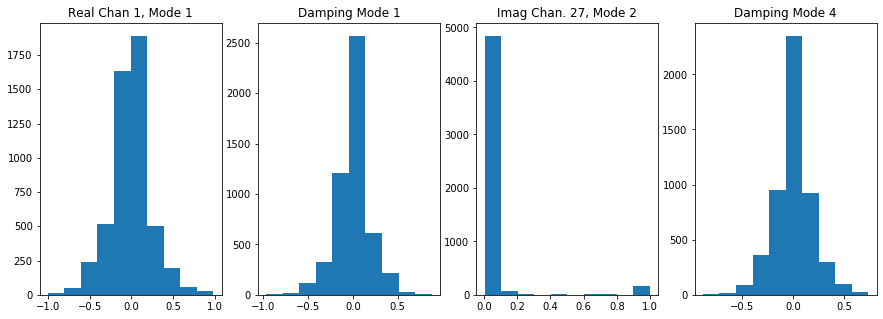

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real Chan 1, Mode 1')
axs[1].hist(df_raw.fn1)
axs[1].set_title('Damping Mode 1')
axs[2].hist(df_raw.Imag_Comp7_Mode2)
axs[2].set_title('Imag Chan. 27, Mode 2')
axs[3].hist(df_raw.zeta4)
axs[3].set_title('Damping Mode 4')

In [15]:
valid_idx=np.random.randint(low=0, high=len(df_raw), size=1024) #size is 0.2*totalobersvations

In [16]:
dep_var= 'Subject'

In [17]:
data = TabularDataBunch.from_df(path, df_raw, dep_var, valid_idx=valid_idx)

In [18]:
data.show_batch()

zeta6,Real_Comp32_Mode7,Real_Comp32_Mode1,Trial,Real_Comp12_Mode3,zeta2,Real_Comp15_Mode3,Imag_Comp12_Mode4,Real_Comp29_Mode2,Real_Comp20_Mode2,Imag_Comp13_Mode5,Real_Comp13_Mode7,Real_Comp3_Mode1,Real_Comp27_Mode7,Imag_Comp1_Mode1,Real_Comp9_Mode7,Real_Comp8_Mode3,Imag_Comp18_Mode7,Real_Comp26_Mode2,Real_Comp18_Mode3,Imag_Comp8_Mode3,Imag_Comp1_Mode4,Imag_Comp15_Mode3,fn4,Real_Comp4_Mode2,Real_Comp18_Mode7,Imag_Comp27_Mode3,Imag_Comp30_Mode1,Imag_Comp21_Mode7,Imag_Comp13_Mode2,Real_Comp17_Mode4,Real_Comp11_Mode7,Real_Comp27_Mode2,Real_Comp25_Mode3,Imag_Comp23_Mode1,Imag_Comp19_Mode2,Real_Comp16_Mode1,Real_Comp1_Mode4,Imag_Comp16_Mode1,Imag_Comp28_Mode3,Imag_Comp15_Mode5,Real_Comp31_Mode1,Real_Comp19_Mode5,Imag_Comp2_Mode7,Imag_Comp18_Mode6,Imag_Comp18_Mode4,Imag_Comp9_Mode5,Real_Comp21_Mode2,Real_Comp27_Mode5,Imag_Comp11_Mode4,Imag_Comp15_Mode1,Imag_Comp28_Mode1,Real_Comp22_Mode7,Imag_Comp15_Mode4,Imag_Comp8_Mode5,Real_Comp3_Mode5,Imag_Comp23_Mode5,Real_Comp14_Mode5,Imag_Comp7_Mode3,Imag_Comp1_Mode2,Real_Comp21_Mode6,Imag_Comp4_Mode1,Imag_Comp22_Mode5,Real_Comp11_Mode2,Imag_Comp6_Mode1,Real_Comp23_Mode1,Imag_Comp30_Mode3,Imag_Comp32_Mode5,Imag_Comp6_Mode5,Imag_Comp30_Mode6,Real_Comp22_Mode5,Imag_Comp10_Mode5,Imag_Comp9_Mode3,Imag_Comp7_Mode6,Real_Comp5_Mode5,Real_Comp20_Mode1,Real_Comp30_Mode5,Real_Comp25_Mode1,Real_Comp8_Mode6,Real_Comp32_Mode4,Real_Comp15_Mode7,Real_Comp24_Mode2,Real_Comp5_Mode1,Imag_Comp13_Mode3,Imag_Comp32_Mode6,Real_Comp2_Mode3,Imag_Comp28_Mode6,Imag_Comp32_Mode7,Real_Comp30_Mode6,Real_Comp29_Mode3,Imag_Comp28_Mode2,Imag_Comp29_Mode2,Imag_Comp6_Mode3,Imag_Comp12_Mode7,Imag_Comp27_Mode4,Real_Comp15_Mode4,Imag_Comp11_Mode3,Imag_Comp3_Mode2,fn7,Real_Comp3_Mode4,Real_Comp23_Mode5,Imag_Comp27_Mode5,Imag_Comp26_Mode1,Imag_Comp12_Mode2,Real_Comp3_Mode7,Imag_Comp31_Mode5,Imag_Comp14_Mode1,Real_Comp10_Mode5,Imag_Comp26_Mode4,Real_Comp20_Mode7,Real_Comp12_Mode1,Real_Comp23_Mode6,Real_Comp20_Mode3,Imag_Comp4_Mode4,Imag_Comp10_Mode2,Real_Comp3_Mode6,Real_Comp19_Mode7,Imag_Comp23_Mode2,Real_Comp2_Mode7,Real_Comp6_Mode6,Real_Comp30_Mode2,Imag_Comp29_Mode3,Real_Comp21_Mode5,Real_Comp6_Mode2,Imag_Comp4_Mode7,Real_Comp24_Mode7,Real_Comp22_Mode4,Real_Comp28_Mode5,Imag_Comp28_Mode4,Imag_Comp18_Mode5,Real_Comp24_Mode1,Imag_Comp10_Mode7,Imag_Comp9_Mode2,Imag_Comp14_Mode3,Imag_Comp6_Mode4,Real_Comp26_Mode1,Imag_Comp3_Mode5,Real_Comp31_Mode2,Imag_Comp6_Mode2,Imag_Comp11_Mode2,Imag_Comp24_Mode4,Real_Comp6_Mode1,Real_Comp32_Mode5,Real_Comp5_Mode7,Real_Comp10_Mode6,Real_Comp28_Mode4,Imag_Comp23_Mode3,Real_Comp23_Mode2,Real_Comp15_Mode6,Real_Comp21_Mode1,Imag_Comp25_Mode3,Imag_Comp9_Mode1,Real_Comp7_Mode1,Real_Comp32_Mode2,Imag_Comp9_Mode6,Imag_Comp16_Mode2,Real_Comp1_Mode3,Imag_Comp2_Mode2,Imag_Comp17_Mode1,Real_Comp22_Mode2,Real_Comp31_Mode5,Imag_Comp19_Mode6,Real_Comp27_Mode4,Real_Comp10_Mode4,Real_Comp19_Mode4,Real_Comp7_Mode2,Imag_Comp7_Mode2,Real_Comp18_Mode4,Imag_Comp19_Mode1,Imag_Comp24_Mode5,Imag_Comp24_Mode6,Real_Comp2_Mode5,Real_Comp13_Mode2,Real_Comp28_Mode6,Real_Comp14_Mode7,Real_Comp1_Mode7,Real_Comp20_Mode5,Imag_Comp18_Mode2,Imag_Comp3_Mode3,Real_Comp9_Mode3,Real_Comp22_Mode6,Imag_Comp5_Mode4,Real_Comp2_Mode2,Real_Comp21_Mode3,Real_Comp25_Mode4,Imag_Comp13_Mode6,Imag_Comp10_Mode3,Real_Comp15_Mode1,Real_Comp11_Mode6,Real_Comp12_Mode2,Real_Comp7_Mode7,Imag_Comp1_Mode3,Real_Comp9_Mode4,Real_Comp16_Mode4,Imag_Comp22_Mode7,Real_Comp3_Mode3,Real_Comp18_Mode2,zeta1,Real_Comp17_Mode6,Imag_Comp6_Mode6,Imag_Comp30_Mode4,Imag_Comp2_Mode3,Real_Comp27_Mode3,Imag_Comp14_Mode4,Real_Comp6_Mode4,Imag_Comp24_Mode3,Real_Comp29_Mode1,Imag_Comp8_Mode7,Imag_Comp21_Mode5,Imag_Comp12_Mode1,Imag_Comp24_Mode7,Imag_Comp27_Mode7,Imag_Comp31_Mode6,Real_Comp23_Mode3,Imag_Comp17_Mode6,Real_Comp17_Mode1,Real_Comp23_Mode7,Imag_Comp3_Mode7,Real_Comp9_Mode5,Real_Comp4_Mode4,Imag_Comp12_Mode6,Imag_Comp17_Mode7,Real_Comp8_Mode1,Real_Comp28_Mode2,zeta4,Imag_Comp31_Mode1,Real_Comp20_Mode4,Imag_Comp11_Mode5,Imag_Comp31_Mode4,Real_Comp14_Mode6,Real_Comp25_

In [19]:
max_log_y = np.log(np.max(df_raw['Subject'])*1.2)
y_range = torch.tensor([0, max_log_y])

In [20]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy, emb_szs={'Subject': 32})

In [21]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(463, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=463, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=500, out_features=32, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


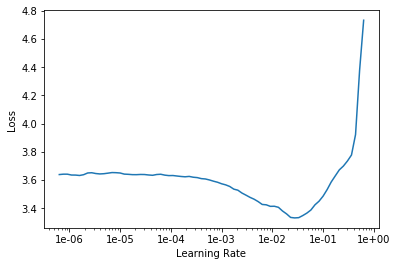

In [22]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.059032,1.224071,0.677734,00:00
1,1.398780,2.294699,0.406250,00:00
2,1.088096,1.500277,0.582031,00:00
3,0.456248,1.210851,0.681641,00:00
4,0.181188,1.199062,0.677734,00:00


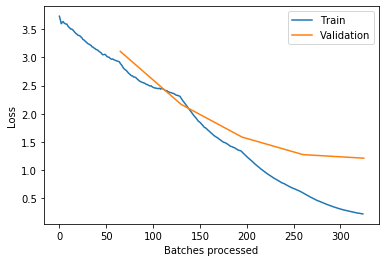

In [24]:
learn.recorder.plot_losses()

In [25]:
learn.show_results()

zeta6,Real_Comp32_Mode7,Real_Comp32_Mode1,Trial,Real_Comp12_Mode3,zeta2,Real_Comp15_Mode3,Imag_Comp12_Mode4,Real_Comp29_Mode2,Real_Comp20_Mode2,Imag_Comp13_Mode5,Real_Comp13_Mode7,Real_Comp3_Mode1,Real_Comp27_Mode7,Imag_Comp1_Mode1,Real_Comp9_Mode7,Real_Comp8_Mode3,Imag_Comp18_Mode7,Real_Comp26_Mode2,Real_Comp18_Mode3,Imag_Comp8_Mode3,Imag_Comp1_Mode4,Imag_Comp15_Mode3,fn4,Real_Comp4_Mode2,Real_Comp18_Mode7,Imag_Comp27_Mode3,Imag_Comp30_Mode1,Imag_Comp21_Mode7,Imag_Comp13_Mode2,Real_Comp17_Mode4,Real_Comp11_Mode7,Real_Comp27_Mode2,Real_Comp25_Mode3,Imag_Comp23_Mode1,Imag_Comp19_Mode2,Real_Comp16_Mode1,Real_Comp1_Mode4,Imag_Comp16_Mode1,Imag_Comp28_Mode3,Imag_Comp15_Mode5,Real_Comp31_Mode1,Real_Comp19_Mode5,Imag_Comp2_Mode7,Imag_Comp18_Mode6,Imag_Comp18_Mode4,Imag_Comp9_Mode5,Real_Comp21_Mode2,Real_Comp27_Mode5,Imag_Comp11_Mode4,Imag_Comp15_Mode1,Imag_Comp28_Mode1,Real_Comp22_Mode7,Imag_Comp15_Mode4,Imag_Comp8_Mode5,Real_Comp3_Mode5,Imag_Comp23_Mode5,Real_Comp14_Mode5,Imag_Comp7_Mode3,Imag_Comp1_Mode2,Real_Comp21_Mode6,Imag_Comp4_Mode1,Imag_Comp22_Mode5,Real_Comp11_Mode2,Imag_Comp6_Mode1,Real_Comp23_Mode1,Imag_Comp30_Mode3,Imag_Comp32_Mode5,Imag_Comp6_Mode5,Imag_Comp30_Mode6,Real_Comp22_Mode5,Imag_Comp10_Mode5,Imag_Comp9_Mode3,Imag_Comp7_Mode6,Real_Comp5_Mode5,Real_Comp20_Mode1,Real_Comp30_Mode5,Real_Comp25_Mode1,Real_Comp8_Mode6,Real_Comp32_Mode4,Real_Comp15_Mode7,Real_Comp24_Mode2,Real_Comp5_Mode1,Imag_Comp13_Mode3,Imag_Comp32_Mode6,Real_Comp2_Mode3,Imag_Comp28_Mode6,Imag_Comp32_Mode7,Real_Comp30_Mode6,Real_Comp29_Mode3,Imag_Comp28_Mode2,Imag_Comp29_Mode2,Imag_Comp6_Mode3,Imag_Comp12_Mode7,Imag_Comp27_Mode4,Real_Comp15_Mode4,Imag_Comp11_Mode3,Imag_Comp3_Mode2,fn7,Real_Comp3_Mode4,Real_Comp23_Mode5,Imag_Comp27_Mode5,Imag_Comp26_Mode1,Imag_Comp12_Mode2,Real_Comp3_Mode7,Imag_Comp31_Mode5,Imag_Comp14_Mode1,Real_Comp10_Mode5,Imag_Comp26_Mode4,Real_Comp20_Mode7,Real_Comp12_Mode1,Real_Comp23_Mode6,Real_Comp20_Mode3,Imag_Comp4_Mode4,Imag_Comp10_Mode2,Real_Comp3_Mode6,Real_Comp19_Mode7,Imag_Comp23_Mode2,Real_Comp2_Mode7,Real_Comp6_Mode6,Real_Comp30_Mode2,Imag_Comp29_Mode3,Real_Comp21_Mode5,Real_Comp6_Mode2,Imag_Comp4_Mode7,Real_Comp24_Mode7,Real_Comp22_Mode4,Real_Comp28_Mode5,Imag_Comp28_Mode4,Imag_Comp18_Mode5,Real_Comp24_Mode1,Imag_Comp10_Mode7,Imag_Comp9_Mode2,Imag_Comp14_Mode3,Imag_Comp6_Mode4,Real_Comp26_Mode1,Imag_Comp3_Mode5,Real_Comp31_Mode2,Imag_Comp6_Mode2,Imag_Comp11_Mode2,Imag_Comp24_Mode4,Real_Comp6_Mode1,Real_Comp32_Mode5,Real_Comp5_Mode7,Real_Comp10_Mode6,Real_Comp28_Mode4,Imag_Comp23_Mode3,Real_Comp23_Mode2,Real_Comp15_Mode6,Real_Comp21_Mode1,Imag_Comp25_Mode3,Imag_Comp9_Mode1,Real_Comp7_Mode1,Real_Comp32_Mode2,Imag_Comp9_Mode6,Imag_Comp16_Mode2,Real_Comp1_Mode3,Imag_Comp2_Mode2,Imag_Comp17_Mode1,Real_Comp22_Mode2,Real_Comp31_Mode5,Imag_Comp19_Mode6,Real_Comp27_Mode4,Real_Comp10_Mode4,Real_Comp19_Mode4,Real_Comp7_Mode2,Imag_Comp7_Mode2,Real_Comp18_Mode4,Imag_Comp19_Mode1,Imag_Comp24_Mode5,Imag_Comp24_Mode6,Real_Comp2_Mode5,Real_Comp13_Mode2,Real_Comp28_Mode6,Real_Comp14_Mode7,Real_Comp1_Mode7,Real_Comp20_Mode5,Imag_Comp18_Mode2,Imag_Comp3_Mode3,Real_Comp9_Mode3,Real_Comp22_Mode6,Imag_Comp5_Mode4,Real_Comp2_Mode2,Real_Comp21_Mode3,Real_Comp25_Mode4,Imag_Comp13_Mode6,Imag_Comp10_Mode3,Real_Comp15_Mode1,Real_Comp11_Mode6,Real_Comp12_Mode2,Real_Comp7_Mode7,Imag_Comp1_Mode3,Real_Comp9_Mode4,Real_Comp16_Mode4,Imag_Comp22_Mode7,Real_Comp3_Mode3,Real_Comp18_Mode2,zeta1,Real_Comp17_Mode6,Imag_Comp6_Mode6,Imag_Comp30_Mode4,Imag_Comp2_Mode3,Real_Comp27_Mode3,Imag_Comp14_Mode4,Real_Comp6_Mode4,Imag_Comp24_Mode3,Real_Comp29_Mode1,Imag_Comp8_Mode7,Imag_Comp21_Mode5,Imag_Comp12_Mode1,Imag_Comp24_Mode7,Imag_Comp27_Mode7,Imag_Comp31_Mode6,Real_Comp23_Mode3,Imag_Comp17_Mode6,Real_Comp17_Mode1,Real_Comp23_Mode7,Imag_Comp3_Mode7,Real_Comp9_Mode5,Real_Comp4_Mode4,Imag_Comp12_Mode6,Imag_Comp17_Mode7,Real_Comp8_Mode1,Real_Comp28_Mode2,zeta4,Imag_Comp31_Mode1,Real_Comp20_Mode4,Imag_Comp11_Mode5,Imag_Comp31_Mode4,Real_Comp14_Mode6,Real_Comp25_

Simply simply lovely. Works great on OMA discontinuous short modes

https://streamable.com/yis3u